# Part - I Data Fetching and Cleaning

In [212]:
#importing the necessary packages

import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.model_selection import train_test_split
import re, math
from collections import Counter
import operator
import matplotlib.pyplot as plt
import geopandas

In [213]:
#Reading the csv file
data = pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv')

#Dropping unnecessary columns 
finaldata = data.drop(['StartDate','EndDate','q1AgeBeginCoding','q2Age','q3Gender','q0004_other','q0005_other','q6LearnCodeUni','q6LearnCodeSelfTaught','q6LearnCodeAccelTrain','q6LearnCodeDontKnowHowToYet','q6LearnCodeOther','q0006_other','q7Level1','q0008_other','q0009_other','q12JobCritPrefTechStack','q12JobCritCompMission','q12JobCritCompCulture','q12JobCritWorkLifeBal','q12JobCritCompensation','q12JobCritProximity','q12JobCritPerks','q12JobCritSmartPeopleTeam','q12JobCritImpactwithProduct','q12JobCritInterestProblems','q12JobCritFundingandValuation','q12JobCritStability','q12JobCritProfGrowth','q12JobCritOther','q0012_other','q13EmpMeasWhiteboard','q13EmpMeasHackerRank','q13EmpMeasOtherCodingChallenge','q13EmpMeasTechPhoneInt','q13EmpMeasTakeHomeProject','q13EmpMeasResume','q13EmpMeasPastWork','q13EmpMeasOther','q0013_other','q14GoodReflecAbilities','q15Level2','q17HirChaInterviews','q17HirChaHardAssessSkills','q17HirChaNotEnoughTalent','q17HirChaNoDiversCandidates','q17HirChaCompfromCompanies','q17HirChaJobDescript','q17HirChaOther','q0017_other','q18NumDevelopHireWithinNextYear','q19TalToolResumeScreen','q19TalToolReferral','q19TalToolHackerRank','q19TalToolOtherProbSolv','q19TalToolPersTest','q19TalToolRemoteorLiveIntTool','q19TalToolOutsourceHumIntPanel','q19TalToolOther','q0019_other','q20CandYearExp','q20CandCompScienceDegree','q20CandCodingBootcamp','q20CandSkillCert','q20CandHackerRankActivity','q20CandOtherCodingCommAct','q20CandGithubPersProj','q20CandOpenSourceContrib','q20CandHackathonPart','q20CandPrevWorkExp','q20CandPrestigeDegree','q20CandLinkInSkills','q20CandGithubPersProj2','q20Other','q0020_other','q21CoreCompProbSolv','q21CoreCompProgLang','q21CoreCompFrameworkProf','q21CoreCompDebugging','q21CoreCompCodebaseNav','q21CoreCompPerfOpt','q21CoreCompCodeReview','q21CoreCompDatabaseDesign','q21CoreCompSysDesign','q21CoreCompTesting','q30LearnCodeAcademicPaper','q30LearnCodeOther','q0030_other','q31Level3','q32RecommendHackerRank','q0032_other','q33HackerRankChallforJob','q34PositiveExp','q34IdealLengHackerRankTest','q0035_other','q36Level4'
], axis=1)
finaldata.head(10)

C:\Users\preks\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,10,19,137,138) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RespondentID,CountryNumeric2,q4Education,q5DegreeFocus,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q0010_other,q16HiringManager,...,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks
0,6464453728,South Korea,Some college,Computer Science,Student,Students,Student,NaN,student,No,...,Hate,Hate,Hate,Same here! I don?t know how to use above things,Stack Overflow,YouTube,NaN,NaN,NaN,NaN
1,6478031510,Ukraine,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,NaN,Software Test Engineer,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
2,6464392829,Malaysia,Some college,"Other STEM (science, technology, engineering, ...",Student,Students,Student,Education,NaN,No,...,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN
3,6481629912,Curaçao,College graduate,Computer Science,Student,Students,Student,NaN,student,No,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN
4,6488385057,NaN,College graduate,NaN,Senior developer,NaN,Front-end Developer,Technology,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
5,6463843138,United States,College graduate,Computer Science,NaN,NaN,NaN,Technology,NaN,No,...,NaN,NaN,NaN,NaN,NaN,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
6,6458326054,United States,"Post graduate degree (Masters, PhD)",Computer Science,Director / VP of Engineering,NaN,Unemployed,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
7,6467198274,United States,College graduate,"Other STEM (science, technology, engineering, ...",New grad,NaN,NaN,Education,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",NaN
8,6477950548,Switzerland,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",Student,Students,NaN,Technology,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
9,6477542461,Israel,High school graduate,Computer Science,Student,Students,Student,Security,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,NaN,Books


The NaN values in this dataset are represented by '#NULL!'. We will replace '#NULL!' by 'NaN' so that it will ease our computation
The NaN values in the q10Industry column are represented as 0 for convinience 

In [214]:
finaldata.replace('#NULL!',np.nan,inplace = True)
finaldata.replace('nan',np.nan,inplace=True)
finaldata['q10Industry'].replace(np.nan,'0',inplace=True)
finaldata.head(10)

,RespondentID,CountryNumeric2,q4Education,q5DegreeFocus,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q0010_other,q16HiringManager,...,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks
0,6464453728,South Korea,Some college,Computer Science,Student,Students,Student,0,student,No,...,Hate,Hate,Hate,Same here! I don?t know how to use above things,Stack Overflow,YouTube,NaN,NaN,NaN,NaN
1,6478031510,Ukraine,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,NaN,Software Test Engineer,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
2,6464392829,Malaysia,Some college,"Other STEM (science, technology, engineering, ...",Student,Students,Student,Education,NaN,No,...,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN
3,6481629912,Curaçao,College graduate,Computer Science,Student,Students,Student,0,student,No,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN
4,6488385057,NaN,College graduate,NaN,Senior developer,NaN,Front-end Developer,Technology,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
5,6463843138,United States,College graduate,Computer Science,NaN,NaN,NaN,Technology,NaN,No,...,NaN,NaN,NaN,NaN,NaN,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
6,6458326054,United States,"Post graduate degree (Masters, PhD)",Computer Science,Director / VP of Engineering,NaN,Unemployed,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
7,6467198274,United States,College graduate,"Other STEM (science, technology, engineering, ...",New grad,NaN,NaN,Education,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",NaN
8,6477950548,Switzerland,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",Student,Students,NaN,Technology,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
9,6477542461,Israel,High school graduate,Computer Science,Student,Students,Student,Security,NaN,No,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,NaN,Books


In [215]:
#dropped rows which contained all nan values
dropped_rows = finaldata.dropna(subset=['q22LangProfAgnostic', 'q22LangProfC', 'q22LangProfCPlusPlus',
       'q22LangProfJava', 'q22LangProfPython', 'q22LangProfRuby',
       'q22LangProfJavascript', 'q22LangProfCSharp', 'q22LangProfGo',
       'q22LangProfScala', 'q22LangProfPerl', 'q22LangProfSwift',
       'q22LangProfPascal', 'q22LangProfClojure', 'q22LangProfPHP',
       'q22LangProfHaskell', 'q22LangProfLua', 'q22LangProfR',
       'q22LangProfOther'],how='all')


In [216]:
#Dropped rows with countries = nan 
dropped_rows = dropped_rows.dropna(subset=['CountryNumeric2'])
dropped_rows

,RespondentID,CountryNumeric2,q4Education,q5DegreeFocus,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q0010_other,q16HiringManager,...,q29FrameLoveCocoa,q29FrameLoveReactNative,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks
1,6478031510,Ukraine,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,NaN,Software Test Engineer,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
6,6458326054,United States,"Post graduate degree (Masters, PhD)",Computer Science,Director / VP of Engineering,NaN,Unemployed,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books
12,6458360594,Lithuania,College graduate,Computer Science,Senior developer,NaN,Software Engineer,Retail,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,6479893983,Turkey,"Post graduate degree (Masters, PhD)",Computer Science,Engineering manager,NaN,Software Engineer,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books
31,6478794960,India,College graduate,Computer Science,Senior developer,NaN,Data Scientist,Technology,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
38,6464404718,Pakistan,College graduate,Computer Science,Senior developer,NaN,Back-end Developer,Security,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Competitive Coding Sites,NaN,Books
40,6479693460,United States,College graduate,Computer Science,Founder / CEO / CTO,NaN,Software Architect,Technology,NaN,Yes,...,NaN,Love,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books
42,6463550038,United States,College graduate,Computer Science,Senior developer,NaN,Software Engineer,Financial Services,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,NaN
43,6480657500,United States,"Post graduate degree (Masters, PhD)",Computer Science,Principal engineer,NaN,Software Architect,Non-Profit,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books
47,6478832462,United States,College graduate,Computer Science,Senior developer,NaN,Full-stack Developer,Insurance,NaN,Yes,...,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN


In [217]:
#Replacing 'Hate' and 'Love' values by appending language names to them for ease of computation
dropped_rows['q28LoveC'].replace('Hate','HateC',inplace = True)
dropped_rows['q28LoveC'].replace('Love','LoveC',inplace = True)

dropped_rows['q28LoveCPlusPlus'].replace('Hate','Hatec++',inplace = True)
dropped_rows['q28LoveCPlusPlus'].replace('Love','LoveC++',inplace = True)

dropped_rows['q28LovePython'].replace('Hate','HatePython',inplace = True)
dropped_rows['q28LovePython'].replace('Love','LovePython',inplace = True)

dropped_rows['q28LoveJava'].replace('Hate','HateJava',inplace = True)
dropped_rows['q28LoveJava'].replace('Love','LoveJava',inplace = True)

dropped_rows['q28LoveRuby'].replace('Hate','HateRuby',inplace = True)
dropped_rows['q28LoveRuby'].replace('Love','LoveRuby',inplace = True)

dropped_rows['q28LoveJavascript'].replace('Hate','HateJavascript',inplace = True)
dropped_rows['q28LoveJavascript'].replace('Love','LoveJavascript',inplace = True)

dropped_rows['q28LoveCSharp'].replace('Hate','HateCSharp',inplace = True)
dropped_rows['q28LoveCSharp'].replace('Love','LoveCSharp',inplace = True)

dropped_rows['q28LoveGo'].replace('Hate','HateGo',inplace = True)
dropped_rows['q28LoveGo'].replace('Love','LoveGo',inplace = True)

dropped_rows['q28LoveScala'].replace('Hate','HateScala',inplace = True)
dropped_rows['q28LoveScala'].replace('Love','LoveScala',inplace = True)

dropped_rows['q28LovePerl'].replace('Hate','HatePerl',inplace = True)
dropped_rows['q28LovePerl'].replace('Love','LovePerl',inplace = True)

dropped_rows['q28LoveSwift'].replace('Hate','HateSwift',inplace = True)
dropped_rows['q28LoveSwift'].replace('Love','LoveSwift',inplace = True)

dropped_rows['q28LovePascal'].replace('Hate','HatePascal',inplace = True)
dropped_rows['q28LovePascal'].replace('Love','LovePascal',inplace = True)

dropped_rows['q28LoveClojure'].replace('Hate','HateClojure',inplace = True)
dropped_rows['q28LoveClojure'].replace('Love','LoveClojure',inplace = True)

dropped_rows['q28LovePHP'].replace('Hate','HatePHP',inplace = True)
dropped_rows['q28LovePHP'].replace('Love','LovePHP',inplace = True)

dropped_rows['q28LoveHaskell'].replace('Hate','HateHaskell',inplace = True)
dropped_rows['q28LoveHaskell'].replace('Love','LoveHaskell',inplace = True)

dropped_rows['q28LoveLua'].replace('Hate','HateLua',inplace = True)
dropped_rows['q28LoveLua'].replace('Love','LoveLua',inplace = True)

dropped_rows['q28LoveR'].replace('Hate','HateR',inplace = True)
dropped_rows['q28LoveR'].replace('Love','LoveR',inplace = True)

dropped_rows['q28LoveRust'].replace('Hate','HateRust',inplace = True)
dropped_rows['q28LoveRust'].replace('Love','LoveRust',inplace = True)

dropped_rows['q28LoveKotlin'].replace('Hate','HateKotlin',inplace = True)
dropped_rows['q28LoveKotlin'].replace('Love','LoveKotlin',inplace = True)

dropped_rows['q28LoveTypescript'].replace('Hate','HateTypescript',inplace = True)
dropped_rows['q28LoveTypescript'].replace('Love','LoveTypescript',inplace = True)

dropped_rows['q28LoveErlang'].replace('Hate','HateErlang',inplace = True)
dropped_rows['q28LoveErlang'].replace('Love','LoveErlang',inplace = True)

dropped_rows['q28LoveJulia'].replace('Hate','HateJulia',inplace = True)
dropped_rows['q28LoveJulia'].replace('Love','LoveJulia',inplace = True)

dropped_rows['q28LoveOCaml'].replace('Hate','HateOCaml',inplace = True)
dropped_rows['q28LoveOCaml'].replace('Love','LoveOCaml',inplace = True)

In [218]:
#Updated Columns:
dropped_rows.iloc[:,104:126].head(10)

,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,...,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia
1,NaN,NaN,LoveJava,NaN,NaN,HateJavascript,LoveCSharp,NaN,NaN,NaN,...,NaN,HatePHP,NaN,NaN,NaN,NaN,LoveKotlin,NaN,NaN,NaN
6,LoveC,LoveC++,NaN,LovePython,NaN,LoveJavascript,NaN,NaN,NaN,LovePerl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,LoveC,LoveC++,LoveJava,LovePython,NaN,LoveJavascript,LoveCSharp,LoveGo,NaN,NaN,...,NaN,NaN,LoveHaskell,NaN,NaN,NaN,NaN,LoveTypescript,NaN,NaN
20,LoveC,LoveC++,NaN,NaN,NaN,HateJavascript,LoveCSharp,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,LoveC,LoveC++,LoveJava,LovePython,NaN,LoveJavascript,NaN,NaN,LoveScala,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,LoveC,LoveC++,NaN,LovePython,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LoveRust,NaN,NaN,NaN,NaN
42,NaN,NaN,LoveJava,NaN,HateRuby,HateJavascript,LoveCSharp,NaN,NaN,NaN,...,NaN,HatePHP,NaN,NaN,NaN,NaN,NaN,LoveTypescript,NaN,NaN
43,NaN,Hatec++,HateJava,LovePython,NaN,LoveJavascript,LoveCSharp,NaN,LoveScala,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HateTypescript,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
#Merging Love/Hate skill columns of each candidate to obtain set of liked and disliked skills
dropped_rows['LikingSet'] = dropped_rows[dropped_rows.columns[104:126]].apply(lambda x: ','.join(x.dropna()),axis=1)

In [220]:
#Merging skill columns for each candidate to obtain a skillset of candidate
dropped_rows['HiringSkillSet'] = dropped_rows[dropped_rows.columns[10:28]].apply(lambda x: ','.join(x.dropna()),axis=1)


In [221]:
dropped_rows

,RespondentID,CountryNumeric2,q4Education,q5DegreeFocus,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q0010_other,q16HiringManager,...,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,LikingSet,HiringSkillSet
1,6478031510,Ukraine,"Post graduate degree (Masters, PhD)","Other STEM (science, technology, engineering, ...",NaN,NaN,Software Test Engineer,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books,"LoveJava,HateJavascript,LoveCSharp,HatePHP,Lov...",Java
6,6458326054,United States,"Post graduate degree (Masters, PhD)",Computer Science,Director / VP of Engineering,NaN,Unemployed,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,Books,"LoveC,LoveC++,LovePython,LoveJavascript,LovePe...",Language agnostic
12,6458360594,Lithuania,College graduate,Computer Science,Senior developer,NaN,Software Engineer,Retail,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LoveC,LoveC++,LoveJava,LovePython,LoveJavascri...",Language agnostic
20,6479893983,Turkey,"Post graduate degree (Masters, PhD)",Computer Science,Engineering manager,NaN,Software Engineer,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"LoveC,LoveC++,HateJavascript,LoveCSharp","C,C#"
31,6478794960,India,College graduate,Computer Science,Senior developer,NaN,Data Scientist,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books,"LoveC,LoveC++,LoveJava,LovePython,LoveJavascri...","Java,Python,Scala"
38,6464404718,Pakistan,College graduate,Computer Science,Senior developer,NaN,Back-end Developer,Security,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,Competitive Coding Sites,NaN,Books,"LoveC,LoveC++,LovePython","Language agnostic,C,C++"
40,6479693460,United States,College graduate,Computer Science,Founder / CEO / CTO,NaN,Software Architect,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books,LoveRust,
42,6463550038,United States,College graduate,Computer Science,Senior developer,NaN,Software Engineer,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,NaN,"LoveJava,HateRuby,HateJavascript,LoveCSharp,Ha...",Language agnostic
43,6480657500,United States,"Post graduate degree (Masters, PhD)",Computer Science,Principal engineer,NaN,Software Architect,Non-Profit,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"Hatec++,HateJava,LovePython,LoveJavascript,Lov...","Language agnostic,Java,Javascript,C#"
47,6478832462,United States,College graduate,Computer Science,Senior developer,NaN,Full-stack Developer,Insurance,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN,,Javascript


In [222]:
#Resetting the index column
dropped_rows = dropped_rows.reset_index()
dropped_rows.drop('index', axis=1, inplace=True)

In [223]:
# Splitting into training and testing data in the ratio 85 : 15
X = dropped_rows.iloc[:,:]
X_train, X_test = train_test_split(X, test_size = .15)

#Reindexing for convinience
X_train = X_train.reset_index()
X_train.drop('index', axis=1, inplace=True)

X_test = X_test.reset_index()
X_test.drop('index', axis=1, inplace=True)

#APPROACH USED FOR RECOMMENDATION

The dataset is divided into 85:15 ratio for Train:Test.

For this recommendation system, we have tried to formulate an approach which is different from the general recommendation system algorithms that exist.

We start with the Respondent ID of the user for which we have to make recommendations.

2.) Using the Respondent ID we retrieve the ‘country’ of that user.

For that ‘country’,we make a list of all the industries where the respondents currently work (for that specific country).

For each industry that we have got,we find a cumulative skill sets of all the respondents of that country and further of that specific industry.

Now for each industry in the list that we got above,we find all the respondents having that industry.

Using the above 2 lists,we have 2 lists:

List 1  - cumulative skill set of that industry.

List 2 - skillset of a particular user from that industry.

3.)  For Example: a respondent from ‘United States’ , we have a set of industries which includes [Technology,Media,HealthCare’].

4.)  We find a cumulative skill set of all the respondents of ‘United States’ working in the field of ‘Technology’.This will be the List 1.

5.)  For every user of ‘United States’ -> ‘Technology’,we get the skill set of that user and use it as our List 2.

6.)  This List 2 is created for all the users of  ‘United States’ -> ‘Technology’ with List 1 constant for all users with that specific ‘Industry’.

7.)  For every combination of List 1 and List 2,we find a similarity score using Jaccard similarity i.e (Intersection / Union).

8.)  So for every user of  ‘United States’ -> ‘Technology’ we have a similarity score.

9.)  This formation of lists and the  same procedure is repeated for all the industries of the country of respondent.

10.) Now we calculate this similarity score for the user for which we have to make recommendations.

    (a)We calculate the score for the user by varying List 1 as a cumulative list for each industry of its country.

    (b)List 2 will be constant which will have the skills of the user for whom we will recommend.

11.)  After getting these similarity scores,we find all the users of ‘United States’ -> ‘Technology’ who have a similarity score greater than the score of the ‘user for whom we have to recommend’.

12.)  We take all the users with greater similarity score because these users have skills which are more aligned to the skill set of overall skill trend in that industry.So our ‘user for whom we have to recommend’, will have an ideal set to match it’s skills to.

13.)  Unique set of skills is obtained from this cumulative list and a difference of this set with user’s skill set is found.

14.)  This difference gives us the list of skills that user doesn’t have yet.

15.)  This list is further filtered based on the love/hate preference of the  ‘user for whom we have to recommend’.So that if the person doesn't like a language,we remove it from the recommendation set.

16.)  The above step gives us a final set which forms a recommendation skill set for the industry = ‘Technology’.

17.)  We find similar set for all the industries of the user’s country by repeating steps 12) to 16).

18.)  Final output that we give for a particular ‘Respondent ID’ is a dictionary of Industry and skills required to work in that industry.

Example output is shown below:

{‘Technology’ : C++,C,Python,Go 

  ‘HealthCare’ : Scala,Java,JavaScript,

  ‘Media’ : R,C#,Java }

# Part - 2 Recommendation System

In [224]:
#Fetch country of the given RespondentID from the test data
def getCountry(RespondentID):
    row = X_test[X_test['RespondentID'] == RespondentID]
    country = row.CountryNumeric2
    return country

In [225]:
#Conversion to string for ease of computation
def proper_countryName(x):
    x = x.tolist()
    x = str(x)
    x = x.split('\'')[1]
    return x

In [226]:
#Fetch industries from the country provided
def fetch_industry(country_name):
    industry_set = []
    X_train['CountryNumeric2'] = X_train.CountryNumeric2.astype(str)
    for index, row in X_train.iterrows():
        if(row.CountryNumeric2 == country_name):
            if(row.q10Industry != '0'):
                industry_set.append(row.q10Industry)
    return set(industry_set)

In [227]:
#Fetch country wise industry specific skillsets
def fetch_hiringskillset(country,industry):
    hiringskill_set = []
    for index, row in X_train.iterrows():
        if(row.CountryNumeric2 == country):
            if(row.q10Industry == industry):
                hiringskill_set.append(row.HiringSkillSet)
    hiringskill_set = uniue_skillset(hiringskill_set)
    return hiringskill_set

In [228]:
#Remove duplicate values from the fetched skillset
def uniue_skillset(skillset_list):
    Count_Industry_Skill = []
    for count in skillset_list:
        temp = re.split(r'[,\']+', count)
        Count_Industry_Skill.append(temp)
    skill_set = [item for sublist in Count_Industry_Skill for item in sublist]
    skill_set = set(skill_set)
    return skill_set

In [229]:
#Fetch skillsets of every industry present in the provided country
def industry_specific_skillset(country):
    country_industry = fetch_industry(country)
    dictionary = {key:None for key in country_industry}
    for i in country_industry:
        industry_skill = fetch_hiringskillset(country,i)
        for key,value in dictionary.items():
            dictionary[i] = industry_skill
    return dictionary

In [230]:
#To calculate Jaccard similarity between candidiates
def jaccard_similarity(list1, list2):
    return float(len(set(list1).intersection(list2)) / len(list1|list2))

In [231]:
#To find similarity score between industry specific skill set and skillset of every user present in that industry
def user_similarity_score(unique_skillsets,Industry_users):
    jacarrd = []
    for count in Industry_users['HiringSkillSet']:
        candidatelist = count
        candidatelist = re.split(r'[,\']+', candidatelist)
        candidatelist = set(candidatelist)
        score = jaccard_similarity(unique_skillsets,candidatelist)
        jacarrd.append(score)
    return jacarrd

In [232]:
#To find similarity score between industry specific skill set and skillset of tester candidiate
def tester_similarity_score(unique_skillsets,finalskillset):
    jaccard = 0.0
    finalskillset = set(finalskillset)
    score = jaccard_similarity(unique_skillsets,finalskillset)
    jaccard = score
    return jaccard

In [233]:
#To find candidates from training dataset with scores greater than tester candidiate score

def similarUsers(jacarrdsimilarity,test_user):
    similar_users = []
    for i in jacarrdsimilarity:
        if(i > test_user):
            similar_users.append(jacarrdsimilarity.index(i))
    similar_users = set(similar_users)   
    similar_users = list(similar_users)
    return similar_users

In [234]:
#function to find candidates which had similarity score greater than tester candidate's score
def usersWithGreaterSimilarityScore(similar_users,Industry_users):
    cumulative_list = []
    for i in similar_users:
        temp = Industry_users.iloc[i,2]
        temp = temp.split(',')
        for j in temp:
            cumulative_list.append(j)
    cumulative_list = set(cumulative_list)
    return cumulative_list

In [235]:
#To find skills of tester candidate and converting from string to list and then to set
def testerUser(id):
    test_user_skill = X_test.loc[X_test['RespondentID'] == id]
    test_user_skill = test_user_skill['HiringSkillSet']
    test_user_skill = set(test_user_skill)
    test_user_skill = str(test_user_skill)   
    test_user_skill = re.split(r'[,\']+', test_user_skill)
    test_user_skill = test_user_skill[1:-1]
    test_user_skill = set(test_user_skill)
    return test_user_skill

In [236]:
#To filter recommended skill set based on tester candidate's likings
def loveHateFilter(testerid):
    hate_list = []
    row =  X_test.loc[X_test['RespondentID']==testerid].index[0]
    loveHate_SkillSet = X_test.iloc[row,-2]
    skillset_list = loveHate_SkillSet.split(',')
    for i in skillset_list:
        if i:
            if(i[0] == 'H'):
                hate_list.append(i[4:])
    return set(hate_list)

In [237]:
#Recommneder System to recommend the required skillsets
def recommendation_system(respondent_id):
    country = getCountry(respondent_id)
    country_last = proper_countryName(country)
    industry = fetch_industry(country_last)
    Recommendation_dictionary = {key:None for key in industry}
    skillset = industry_specific_skillset(country_last)
    for industry in skillset:
        skills = skillset[industry]
        users_c = X_train.loc[X_train['CountryNumeric2'] == country_last]
        users = users_c.loc[users_c['q10Industry'] == industry]
        Industry_users = users[['q10Industry','RespondentID','HiringSkillSet']]
        temp = Industry_users['HiringSkillSet'].tolist()
        unique_skillsets = uniue_skillset(temp)
        scores = user_similarity_score(unique_skillsets,Industry_users)
        final_skillset = testerUser(respondent_id)
        tester_score = tester_similarity_score(unique_skillsets,final_skillset)
        user_similarity = similarUsers(scores,tester_score)
        ideal_useSkillSet = usersWithGreaterSimilarityScore(user_similarity,Industry_users)
        hate_skillset = loveHateFilter(respondent_id)
        recommended_skillset = ideal_useSkillSet.difference(final_skillset)
        filtered_recommended_skillset = recommended_skillset.difference(hate_skillset)
        Recommendation_dictionary[industry] = filtered_recommended_skillset
    return Recommendation_dictionary

In [238]:
X_test


,RespondentID,CountryNumeric2,q4Education,q5DegreeFocus,q8JobLevel,q8Student,q9CurrentRole,q10Industry,q0010_other,q16HiringManager,...,q29FrameLoveRubyMotion,q0029_other,q30LearnCodeStackOverflow,q30LearnCodeYoutube,q30LearnCodeMOOC,q30LearnCodeCompCodingSites,q30LearnCodeOnlineTutorial,q30LearnCodeBooks,LikingSet,HiringSkillSet
0,6465020642,Brazil,College graduate,Computer Science,Architect,NaN,Software Engineer,Retail,e-commerce,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"LoveJava,LovePython,LoveJavascript,HatePHP","Java,Javascript"
1,6464405985,Russian Federation,High school graduate,"Other STEM (science, technology, engineering, ...",NaN,NaN,Software Engineer,Aerospace & Defense,NaN,Yes,...,NaN,Qt: love,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"LoveC,LoveC++,LovePython","C,C++"
2,6460675541,United States,Some college,Computer Science,Senior developer,NaN,Reliability Engineer,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",Competitive Coding Sites,"Online tutorials (i.e. Pluralsight, Lynda.com,...",NaN,"LoveC++,HateJava,LovePython,LoveJavascript,Lov...","Language agnostic,Python,Ruby,Go,Perl"
3,6466151328,Mexico,"Post graduate degree (Masters, PhD)",Computer Science,Principal engineer,NaN,Back-end Developer,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,NaN,Books,"LoveC,LoveJava,LovePython,HatePerl","Language agnostic,Java,Python"
4,6487025708,India,College graduate,Computer Science,Senior developer,NaN,Back-end Developer,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",Competitive Coding Sites,NaN,Books,"LoveC,LoveC++,LoveJava,LovePython,LoveRuby,Hat...","Java,Python"
5,6457733958,United States,College graduate,NaN,Level 1 developer (junior),NaN,Full-stack Developer,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",NaN,"HateJava,LovePython","Python,Javascript"
6,6474356572,India,College graduate,Computer Science,Level 1 developer (junior),NaN,Back-end Developer,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,NaN,Books,"LoveC,LoveC++,LoveJava,LovePython,LoveJavascript","Java,Python,Javascript,Go,Scala"
7,6474342140,India,College graduate,Computer Science,Senior developer,NaN,Software Test Engineer,Financial Services,NaN,Yes,...,NaN,NaN,Stack Overflow,YouTube,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",NaN,"HateC,LoveJava,LovePython,LoveRuby,LoveJavascr...","Java,Python,Javascript"
8,6477499163,United Kingdom,"Post graduate degree (Masters, PhD)",Computer Science,Engineering manager,NaN,NaN,Technology,NaN,Yes,...,NaN,NaN,Stack Overflow,NaN,NaN,NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"HateC,LoveCSharp",C#
9,6484147471,United States,"Post graduate degree (Masters, PhD)",Computer Science,Senior developer,NaN,Software Engineer,Professional Services,Market research,Yes,...,NaN,NaN,Stack Overflow,YouTube,"MOOC (i.e. Udemy, Udacity, Coursera, Edx, etc.)",NaN,"Online tutorials (i.e. Pluralsight, Lynda.com,...",Books,"LoveC,Hatec++,LoveJava,LoveRuby,HateJavascript...",Language agnostic


In [239]:
#Tester candidate from test dataset with Respondent ID = 6460675541
#Recommendation System Results:
recommendation_system(6460675541)

{'Energy, Oil, Gas, Utilities': {'Javascript', 'R'},
 'Financial Services': {'C',
  'C#',
  'C++',
  'Clojure',
  'Haskell',
  'Javascript',
  'R',
  'Scala',
  'Swift'},
 'Manufacturing': {'C#', 'PHP'},
 'Real estate': {'C#', 'Javascript'},
 'Non-Profit': {'Javascript', 'PHP', 'Swift'},
 'Health Care': {'C', 'C#', 'C++', 'Javascript', 'R', 'Scala'},
 'Education': {'C', 'C++', 'Javascript', 'PHP'},
 'Media': {'C', 'C#', 'C++', 'Javascript', 'PHP', 'Swift'},
 'Aerospace & Defense': {'C', 'C++', 'Javascript', 'R'},
 'Computer Hardware': {'C', 'C#', 'C++', 'Javascript', 'Lua', 'Pascal'},
 'Government': {'C#', 'C++', 'Javascript', 'PHP'},
 'Food & Beverage': {'C', 'C#', 'Clojure', 'Javascript', 'Swift'},
 'Telecom, Internet Services': {'C++', 'Javascript'},
 'Insurance': {'C#', 'C++', 'Javascript'},
 'Automotive & Transportation': {'C',
  'C#',
  'C++',
  'Haskell',
  'Javascript',
  'R',
  'Scala',
  'Swift'},
 'Travel, Tourism, Accommodation': {'Javascript'},
 'Technology': {'C',
  'C#',

Ranking System for Top 3 industries in candidate's country


In [240]:
#DataFrame to give count of industries present in each country
frame = dropped_rows[['CountryNumeric2','q10Industry','RespondentID']]
industry_count = frame.groupby(['CountryNumeric2' , 'q10Industry']).count()
temp = industry_count.reset_index()
temp = temp.rename(columns={'RespondentID': 'RespondentCount'})
temp.head()

,CountryNumeric2,q10Industry,RespondentCount
0,Afghanistan,Retail,1
1,Albania,Technology,3
2,Algeria,0,1
3,Algeria,Education,1
4,Algeria,Financial Services,1


In [241]:
#To recommend top 3 industries
def top_industrywise_rank(id):
    country = getCountry(id)
    country = proper_countryName(country)
    industries = fetch_industry(country)
    dictionary = {key:[] for key in industries}
    country_dataframe = temp.loc[temp['CountryNumeric2'] == country]
    for index,row in country_dataframe.iterrows():
        j = row.q10Industry
        if (j != '0'):
            dictionary[j].append(row.RespondentCount)
        sorted_x = sorted(dictionary.items(), key=operator.itemgetter(1))
    sorted_list = sorted_x[:-4:-1]
    sorted_string = str(sorted_list)
    sorted_string = re.findall(r'\'(.*?)\'', sorted_string)
    return sorted_string

In [243]:
top_industrywise_rank(6460675541)

['Technology', 'Financial Services', 'Media']

# Part - 3  Model Evaluation Process

In [244]:
#Set of tester ids for recommendation
X_test_ids = X_test['RespondentID']
X_test_ids = X_test_ids.tolist();
X_test_ids = X_test_ids[0:20]
X_test_ids

[6465020642,
 6464405985,
 6460675541,
 6466151328,
 6487025708,
 6457733958,
 6474356572,
 6474342140,
 6477499163,
 6484147471,
 6486878042,
 6468219582,
 6479006023,
 6463716861,
 6461208062,
 6486748947,
 6464104545,
 6483252093,
 6464870875,
 6486816315]

Evaluation function to calculate accuracy of the model using two approaches:

1.) Logical Approach : To calculate accuarcy by taking the ratio of recommended skillset for the candidate and cumulative     skillset of all the users of that particular industry with similarity score greater than that of the tester candidate

2.) Cosine Similarity : Similarity between the skillsets mentioned above

In [245]:
#Evaluation function
def evaluation_function():
    accuracy_for_each = []
    cosine_similarity_for_each = []
    for respondent_id in X_test_ids:
        accuracy_country = []
        cosineSimilarity = []
        country = getCountry(respondent_id)
        country_last = proper_countryName(country)
        industry = fetch_industry(country_last)
        Recommendation_dictionary = {key:None for key in industry}
        skillset = industry_specific_skillset(country_last)
        for industry in skillset:
            skills = skillset[industry]
            users_c = X_train.loc[X_train['CountryNumeric2'] == country_last]
            users = users_c.loc[users_c['q10Industry'] == industry]
            Industry_users = users[['q10Industry','RespondentID','HiringSkillSet']]
            temp = Industry_users['HiringSkillSet'].tolist()
            unique_skillsets = uniue_skillset(temp)
            scores = user_similarity_score(unique_skillsets,Industry_users)
            final_skillset = testerUser(respondent_id)
            tester_score = tester_similarity_score(unique_skillsets,final_skillset)
            user_similarity = similarUsers(scores,tester_score)
            ideal_useSkillSet = usersWithGreaterSimilarityScore(user_similarity,Industry_users)
            hate_skillset = loveHateFilter(respondent_id)
            recommended_skillset = ideal_useSkillSet.difference(final_skillset)
            filtered_recommended_skillset = recommended_skillset.difference(hate_skillset)
            temp_intersection = ideal_useSkillSet.intersection(recommended_skillset)
            
            #Logical approach to find accuracy
            len_intersection = len(temp_intersection)
            len_actual = len(ideal_useSkillSet)
            if(len_actual != 0):
                accuracy_industry = len_intersection/len_actual
                accuracy_country.append(accuracy_industry)
            
            #Cosine Similarity Approach
            list1 = list(ideal_useSkillSet)
            list2 = list(filtered_recommended_skillset)

            a_vals = Counter(list1)
            b_vals = Counter(list2)

            # convert to word-vectors
            words  = list(a_vals.keys() | b_vals.keys())
            a_vect = [a_vals.get(word, 0) for word in words]        
            b_vect = [b_vals.get(word, 0) for word in words]        

            # find cosine
            len_a  = np.sum(av*av for av in a_vect) ** 0.5            
            len_b  = np.sum(bv*bv for bv in b_vect) ** 0.5             
            dot    = np.sum(av*bv for av,bv in zip(a_vect, b_vect))    
            mod_product = (len_a * len_b)
            if(mod_product != 0):
                cosine = dot / (len_a * len_b)
            cosineSimilarity.append(cosine)
        total = 0
        if(len(accuracy_country) != 0):
            for i in accuracy_country:
                total += i
            avg_accuracy = total / len(accuracy_country)
            accuracy_for_each.append(avg_accuracy)
        
        total_cos = 0
        if(len(cosineSimilarity) != 0):
            for i in cosineSimilarity:
                total_cos += i
            avg_cosine = total_cos / len(cosineSimilarity)
            cosine_similarity_for_each.append(avg_cosine)
        
    #Average accuracy across all industries 
    total_sum = 0
    for i in accuracy_for_each:
        total_sum += i
    final_avg = total_sum / len(accuracy_for_each) 
    
    #Average Cosine Similarity across all industries
    cosine_sum = 0
    for i in cosine_similarity_for_each:
        cosine_sum += i
    cosine_avg = cosine_sum / len(cosine_similarity_for_each) 
    
    print("Cosine Similarity : ",cosine_avg)
    print("Accuracy :",final_avg)

In [246]:
evaluation_function()

Cosine Similarity :  0.8392669334612679
Accuracy : 0.7749511662819036


We found the accuracy and cosine similarity for 20 users from our test data set due to lack of computation power.
The function that we wrote can calculate the accuracy for entire test set, given sufficient computation power.
The accuracy that we have got is for 20 users only and can vary when calculated for entire test user set.
This accuracy is estimated and can be generalized for the entire model.

# Exploratory Analysis

Multiple Bar graph

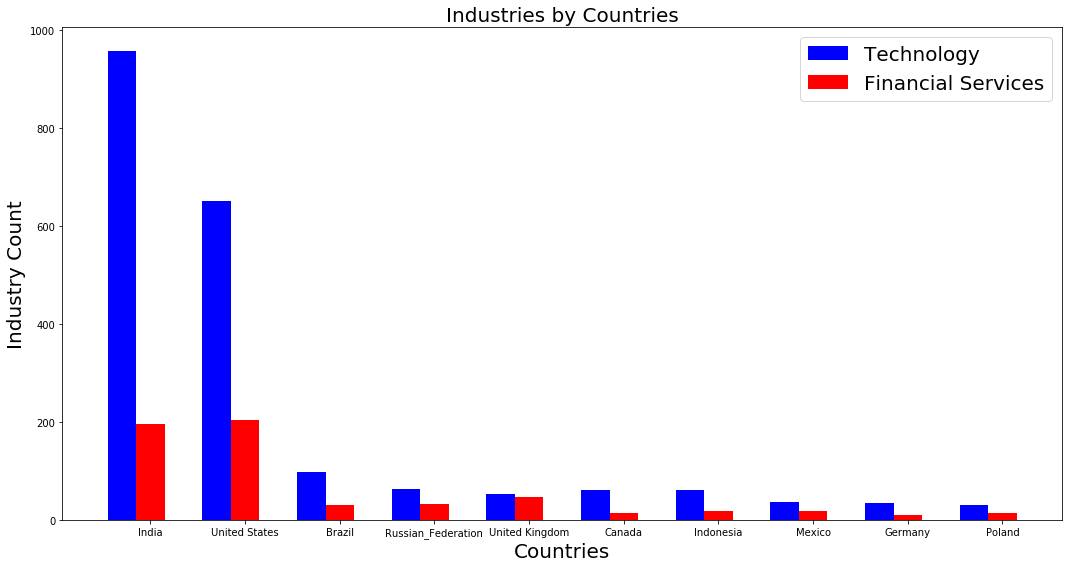

In [247]:
#To plot top 2 industries for top 10 countries based on the number of Candidates

# data to plot
n_groups = 10
Technology = (957,651,97,64,53,61,62,37,34,31)
Financial_Services = (196,203,31,33,47,14,19,18,11,15)

# create plot
fig, ax = plt.subplots(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.30
opacity = 1

rects1 = plt.bar(index, Technology, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Technology')
 
rects2 = plt.bar(index + bar_width, Financial_Services, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Financial Services')


plt.xlabel('Countries',fontsize = 20)
plt.ylabel('Industry Count',fontsize = 20)
plt.title('Industries by Countries',fontsize = 20)
plt.xticks(index + bar_width,  ('India',
'United States', 
'Brazil', 
'Russian_Federation',
'United Kingdom', 
'Canada', 
'Indonesia', 
'Mexico',
'Germany',
'Poland'))
plt.legend(fontsize = 20)

plt.tight_layout()
plt.show()

Heat Maps

In [248]:
#To calculate number of candidates in a particular country
final_countrylist = dropped_rows['CountryNumeric2'].values
final_countrylist1 = final_countrylist.tolist()
my_dict = {i:final_countrylist1.count(i) for i in final_countrylist1}
my_dict

{'Ukraine': 86,
 'United States': 1635,
 'Lithuania': 4,
 'Turkey': 88,
 'India': 1742,
 'Pakistan': 59,
 'Cyprus': 2,
 'China': 11,
 'Mexico': 97,
 'Egypt': 39,
 'Malaysia': 36,
 'United Kingdom': 191,
 'Brazil': 225,
 'Sweden': 36,
 'Poland': 89,
 'Argentina': 40,
 'South Korea': 27,
 'Spain': 67,
 'Russian Federation': 191,
 'Portugal': 37,
 'Peru': 14,
 'Nigeria': 54,
 'Netherlands': 72,
 'Japan': 17,
 'Jamaica': 6,
 'Italy': 59,
 'Indonesia': 138,
 'Greece': 24,
 'Germany': 92,
 'Denmark': 13,
 'Cuba': 4,
 'Canada': 146,
 'Cambodia': 3,
 'Bangladesh': 54,
 'United Arab Emirates': 10,
 'Taiwan': 24,
 'Bulgaria': 39,
 'Lebanon': 2,
 'Hungary': 42,
 'New Zealand': 10,
 'Nepal': 14,
 'Ireland': 21,
 'Belgium': 11,
 'Philippines': 35,
 'Australia': 70,
 'Belarus': 28,
 'Latvia': 8,
 'Romania': 46,
 'Sri Lanka': 21,
 'Mongolia': 3,
 'Israel': 35,
 'Czech Republic': 13,
 'France': 56,
 'Kazakhstan': 17,
 'Iran': 12,
 'Hong Kong': 17,
 'Tunisia': 8,
 'Uganda': 5,
 'Vietnam': 47,
 'Switzer

Preprocssing for plotting Heat Maps

In [249]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.set_index('name',inplace=True)

In [250]:
worldpy = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worldpl = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worldjv = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
worldpy.set_index('name',inplace=True)
worldpl.set_index('name',inplace=True)
worldjv.set_index('name',inplace=True)

In [251]:
country_counts = pd.DataFrame(list(my_dict.items()), columns=['Country', 'UserCounts'])
country_counts.set_index('Country' , inplace=True)

In [252]:
country_counts.head()

,UserCounts
Country,
Ukraine,86
United States,1635
Lithuania,4
Turkey,88
India,1742


No handles with labels found to put in legend.


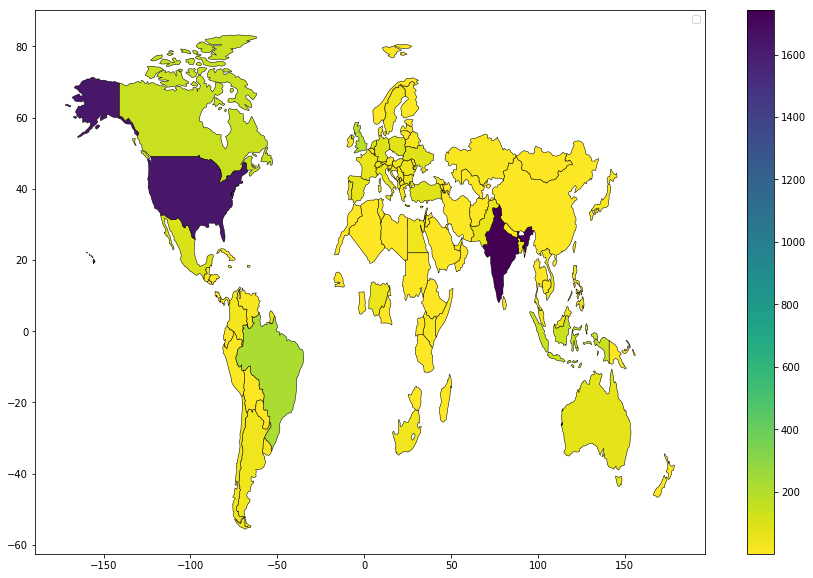

In [253]:
#Heat map to show candidate count in each country
worldUserCounts = world.merge(country_counts,left_index=True,right_index=True)
fig, ax = plt.subplots(figsize=(15,10))
worldUserCounts.plot(column='UserCounts' , cmap='viridis_r', ax=ax , legend=True, edgecolor='Black',linewidth = 0.5)
plt.legend()

In [70]:
#Total number of candidates for each country working with Python
Skill_count = dropped_rows[['RespondentID','CountryNumeric2','q22LangProfPython']]
skill_python = Skill_count.groupby(['CountryNumeric2','q22LangProfPython']).count()
skill_python.head()

,,RespondentID
CountryNumeric2,q22LangProfPython,
Afghanistan,Python,1
Albania,Python,2
Algeria,Python,2
Argentina,Python,12
Armenia,Python,1


In [254]:
#Total number of candidates for each country working with Perl
Skill_count = dropped_rows[['RespondentID','CountryNumeric2','q22LangProfPerl']]
skill_perl = Skill_count.groupby(['CountryNumeric2','q22LangProfPerl']).count()
skill_perl.head()

,,RespondentID
CountryNumeric2,q22LangProfPerl,
Algeria,Perl,1
Australia,Perl,3
Bangladesh,Perl,1
Brazil,Perl,2
Canada,Perl,2


In [255]:
#Total number of candidates for each country working with Java
Skill_count = dropped_rows[['RespondentID','CountryNumeric2','q22LangProfJava']]
skill_java = Skill_count.groupby(['CountryNumeric2','q22LangProfJava']).count()
skill_java.head()

,,RespondentID
CountryNumeric2,q22LangProfJava,
Afghanistan,Java,1
Albania,Java,2
Algeria,Java,4
Argentina,Java,20
Armenia,Java,2


In [256]:
skill_java.reset_index(inplace=True)
skill_python.reset_index(inplace=True)
skill_perl.reset_index(inplace=True)


skill_java.set_index('CountryNumeric2',inplace=True)
skill_python.set_index('CountryNumeric2',inplace=True)
skill_perl.set_index('CountryNumeric2',inplace=True)

In [257]:
worldjava = worldjv.merge(skill_java,left_index=True,right_index=True)
worldpython = worldpy.merge(skill_python,left_index=True,right_index=True)
worldperl = worldpl.merge(skill_perl,left_index=True,right_index=True)

In [258]:
worldjava['Zoomed'] = np.log(worldjava['RespondentID'])
worldpython['Zoomed'] = np.log(worldpython['RespondentID'])
worldperl['Zoomed'] = np.log(worldperl['RespondentID'])

No handles with labels found to put in legend.


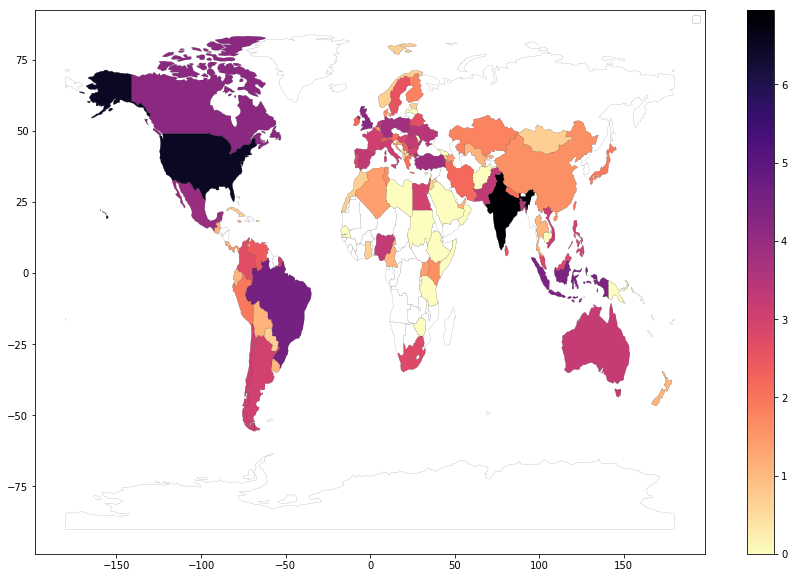

In [259]:
#Heat Map to show countries with dominant language Java
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax , linewidth = 0.1,edgecolor='Black',color='white')
worldjava.plot(column='Zoomed', cmap='magma_r', ax=ax, legend=True, linewidth = 0.1, edgecolor='Black')
plt.legend()

No handles with labels found to put in legend.


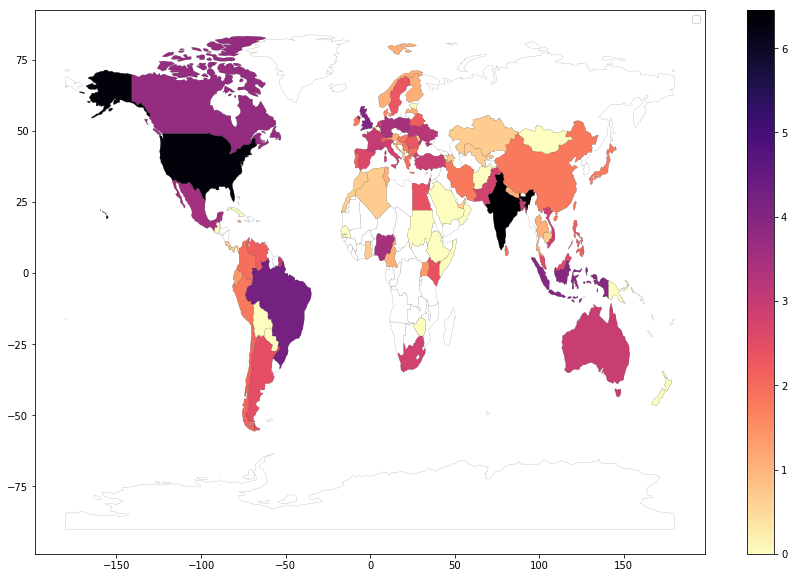

In [260]:
#Heat Map to show countries with dominant language Python
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax , linewidth = 0.1,edgecolor='Black',color='white')
worldpython.plot(column='Zoomed' , cmap='magma_r', ax=ax , legend=True,linewidth = 0.1,edgecolor='Black')
plt.legend()

No handles with labels found to put in legend.


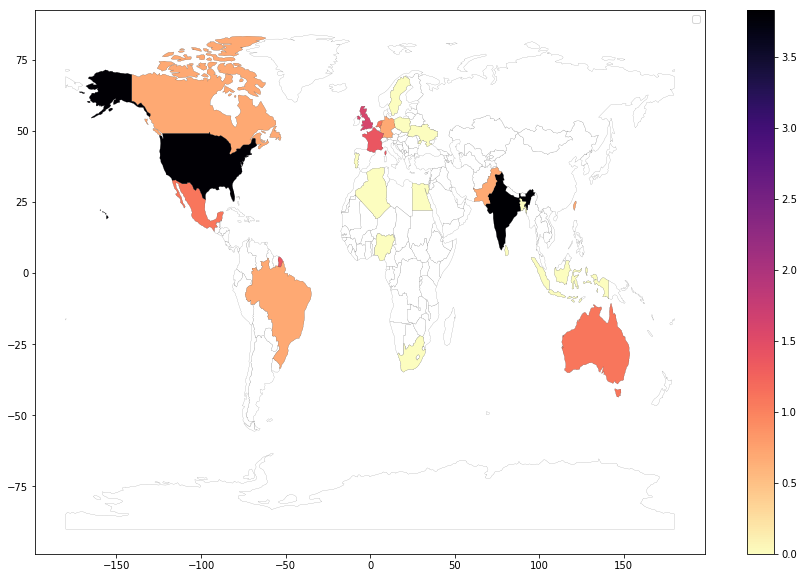

In [261]:
#Heat Map to show countries with dominant language Perl 
fig, ax = plt.subplots(figsize=(15,10))
world.plot(ax=ax , linewidth = 0.1,edgecolor='Black',color='white')
worldperl.plot(column='Zoomed' , cmap='magma_r', ax=ax , legend=True,linewidth = 0.1,edgecolor='Black')
plt.legend()